In [2]:
from enum import Enum
import numpy as np
import random
import matplotlib.pyplot as plt
from copy import deepcopy

In [15]:
class Nodes:
    SIN = (lambda x : np.sin(x[0]), 1)
    COS = (lambda x : np.cos(x[0]), 1)
    SQRT = (lambda x : np.sqrt(x[0]), 1)
    POW = (lambda x : (x[0] + 1E-20) ** x[1], 2)
    SUM = (lambda x : x[0] + x[1], 2)
    SUB = (lambda x : x[0] - x[1], 2)
    PROD = (lambda x : x[0] * x[1], 2)
    FRAC = (lambda x : x[0] / (x[1] + 1E-20), 2)
    TAN = (lambda x : np.tan(x[0]), 1)
    ASIN = (lambda x : np.arcsin(x[0]), 1)
    ACOS = (lambda x : np.arccos(x[0]), 1)
    ATAN = (lambda x : np.arctan(x[0]), 1)
    EXP = (lambda x : np.exp(x[0]), 1)
    LOG = (lambda x : np.log(x[0]), 1)
    NEG = (lambda x : -x[0], 1)
    
    LIST = [SIN, COS, SQRT, SUM, SUB, PROD, FRAC, LOG, NEG]


class Node:

    def __init__(self):
        self.fun = None
        self.args = []

    def __init__(self, fun, args):
        self.fun = fun
        self.args = args

    def __init__(self, wide):
        wide -= random.randint(0, 1)
        if wide <= 0:
            self.fun = None
            self.args = []
            self.args.append(random.randint(0, 2))
            if self.args[0] == 2:
                self.args.append((random.random() - 0.5) * 10)
        else:
            new_node = Nodes.LIST[random.randint(0, len(Nodes.LIST) - 1)]
            self.fun = new_node[0]
            self.args = [Node(wide - 1) for _ in range(new_node[1])]

    def calc(self, tf, idf):
        if self.fun is None:
            if self.args[0] == 0:
                return tf
            elif self.args[0] == 1:
                return idf
            else:
                return self.args[1]
        ans = self.fun([arg.calc(tf, idf) for arg in self.args])
        if type(ans) == complex:
            return 0.
        if ans != ans:
            return 0.
        if abs(ans) > 1e3:
            return ans / abs(ans) * 1e3
#         if ans > 4:
#             return 4.
#         if ans < -4:
#             return -4.
        return ans
    
    def number(self):
        if self.fun is None:
            return 1
        return 1 + sum([node.number() for node in self.args])
    
    def getNth(self, n):
        i = 0
        while self.args[i].number() <= n:
            n -= self.args[i].number()
            i += 1
        if n == 0:
            return self, i
        return self.args[i].getNth(n - 1)

    def getRandom(self):
        rnd = random.randint(0, self.number() - 2)
        return self.getNth(rnd)


class Being:

    def __init__(self, wide):
        self.tree = Node(wide)
    
    def getRandom(self):
        return self.tree.getRandom()

    def reit(self, args, labels):
        err = np.array([self.calc(arg, 0.) for arg in args]) - np.array(labels)
        return np.sum(np.abs(err) ** 2)

    def calc(self, tf, idf):
        return self.tree.calc(tf, idf)
    
    def number(self):
        return self.tree.number()


In [25]:
X = np.array([random.random() * 4 for _ in range(30)])
Y = X ** 3 + np.sqrt(np.log(X + 1)) * 2

In [26]:
generation = [Being(4) for _ in range(100)]

In [27]:
generation = sorted(generation, key=lambda being : being.reit(X, Y))
print (generation[0].reit(X, Y))
print (generation[0].reit(X, Y))
print (generation[0].reit(X, Y))
print (generation[0].reit(X, Y))
print (generation[1].reit(X, Y))
print (generation[2].reit(X, Y))
print (generation[3].reit(X, Y))

6897.829463815379
6897.829463815379
6897.829463815379
6897.829463815379
8798.300370136321
9497.441175724889
9799.55069499389


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


In [28]:
line = np.linspace(0, 4, 20)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


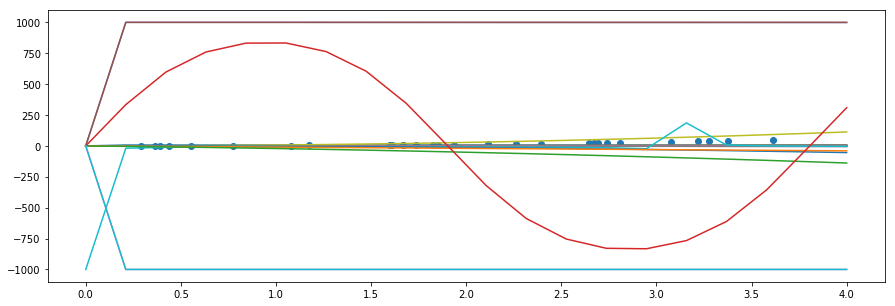

In [29]:
plt.figure(figsize=(15, 5))
plt.scatter(X, Y)
for being in generation:
    plt.plot(line, [being.calc(p, 0) for p in line])
plt.show()

In [30]:
def crossfit(x, y):
    x_ = deepcopy(x)
    y_ = deepcopy(y)
    n1, id1 = x_.getRandom()
    n2, id2 = y_.getRandom()
    n1.args[id1], n2.args[id2] = n2.args[id2], n1.args[id1]
    return x_

In [31]:
def mutation_rand_tree(x):
    x_ = deepcopy(x)
    n1, id1 = x_.getRandom()
    n1.args[id1] = Node(3)
    return x_

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


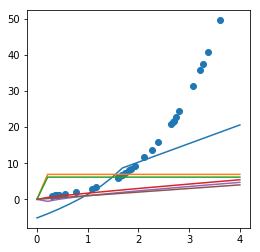

3032.2213894937763


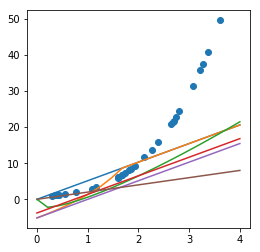

2964.166124719591


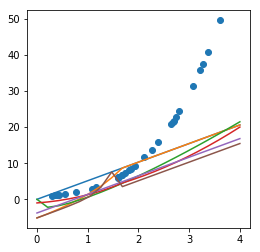

2964.166124719591


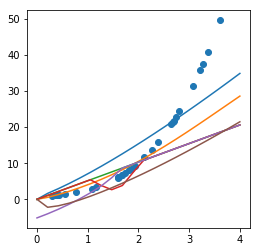

1143.9301665068042


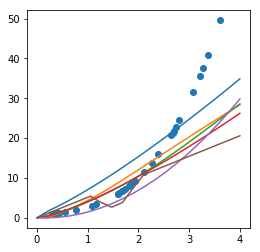

1143.9301665068042


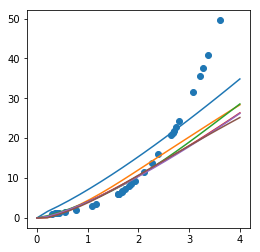

1143.9301665068042


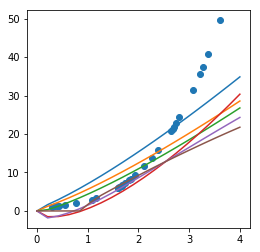

1143.9301665068042


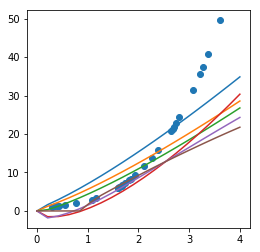

1143.9301665068042


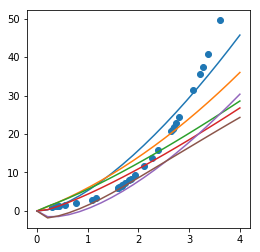

570.5986532347749


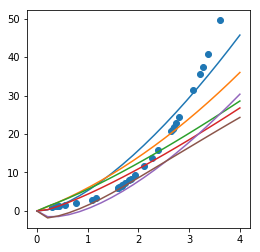

570.5986532347749


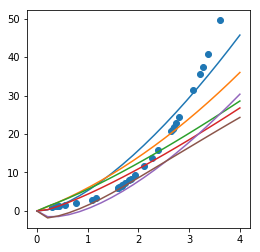

570.5986532347749


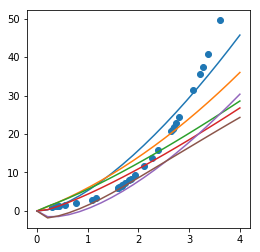

570.5986532347749


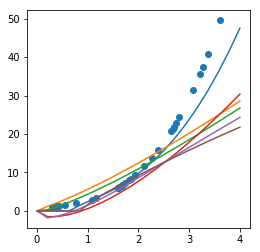

487.7827144827832


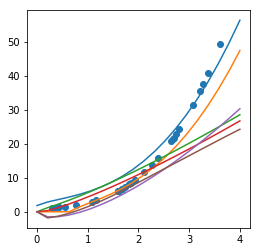

262.5896231280968


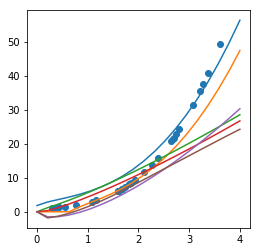

262.5896231280968


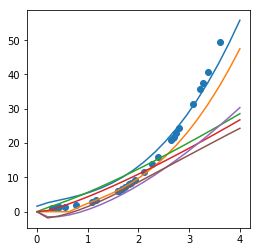

218.18237610268324


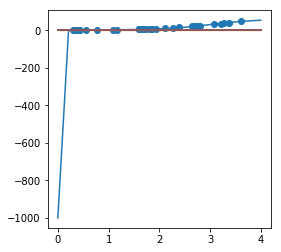

60.21586712434361


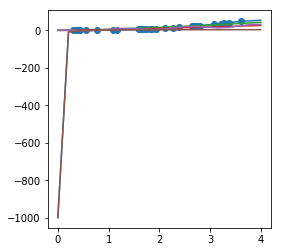

60.21586712434361


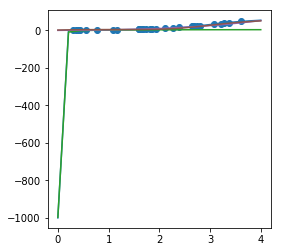

60.21586712434361


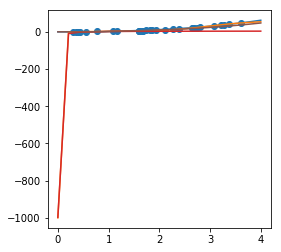

59.95464155809803


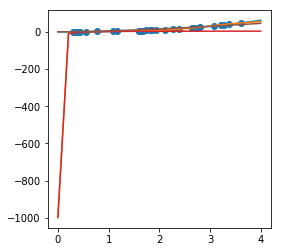

59.95464155809803


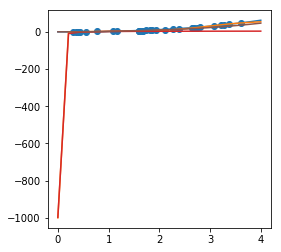

59.95464155809803


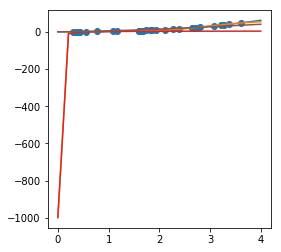

59.95464155809803


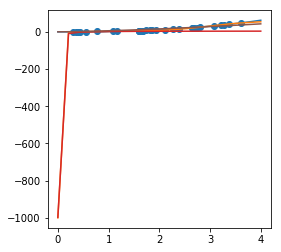

59.95464155809803


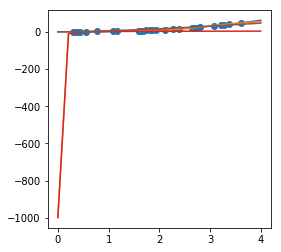

59.95464155809803


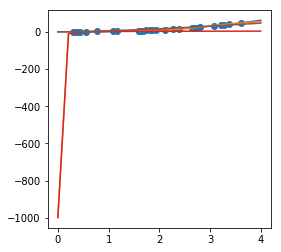

59.95464155809803


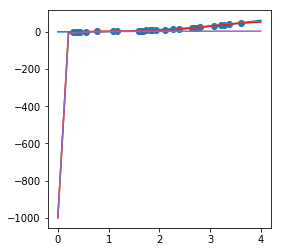

59.95464155809803


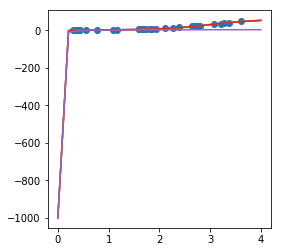

47.702377276153385


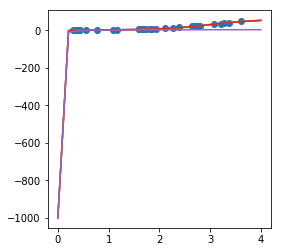

47.702377276153385


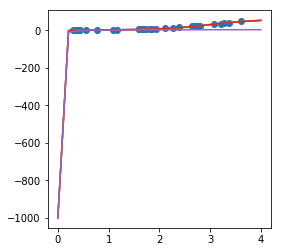

47.702377276153385


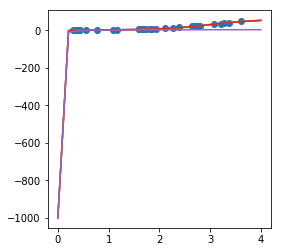

47.702377276153385


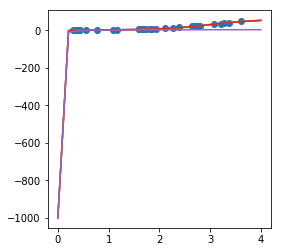

47.702377276153385


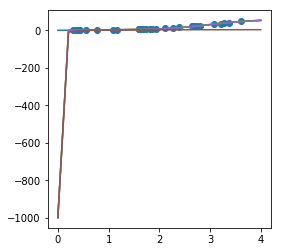

45.412260336844604


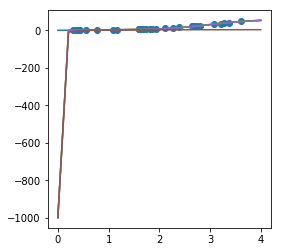

45.412260336844604


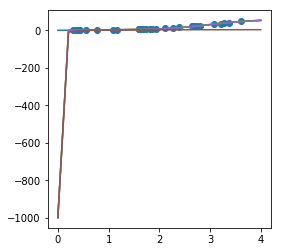

45.412260336844604


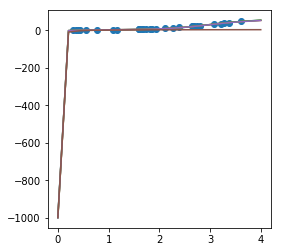

35.88359233126856


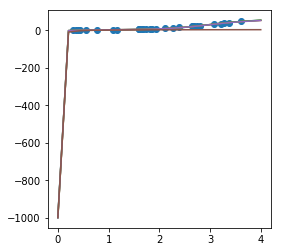

35.88359233126856


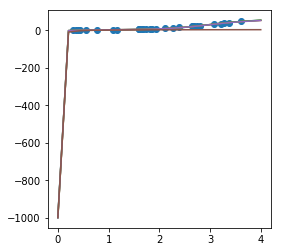

35.88359233126856


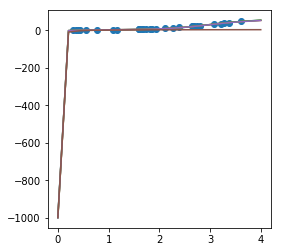

35.88359233126856


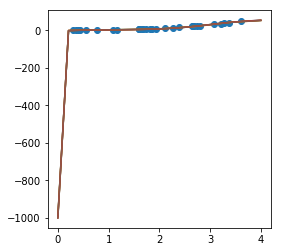

35.88359233126856


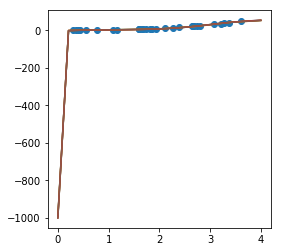

35.88359233126856


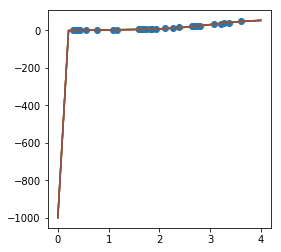

30.30265694832435


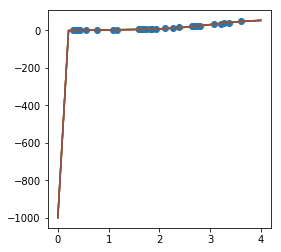

30.30265694832435


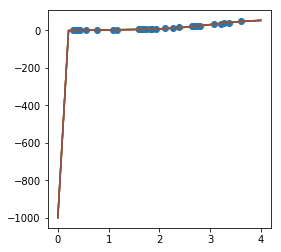

30.30265694832435


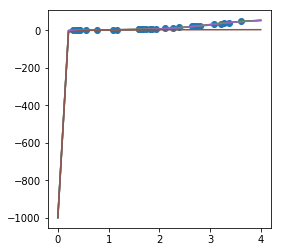

30.180565061731766


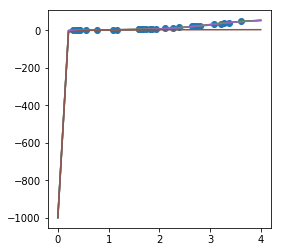

30.180565061731766


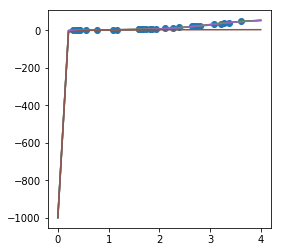

30.180565061731766


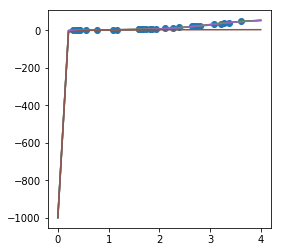

30.180565061731766


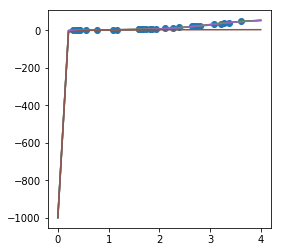

30.180565061731766


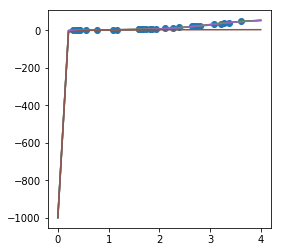

30.180565061731766


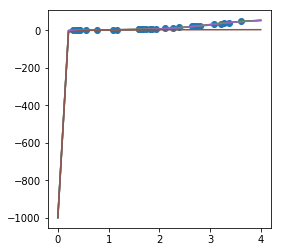

30.180565061731766


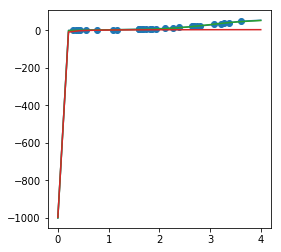

16.300105184939717


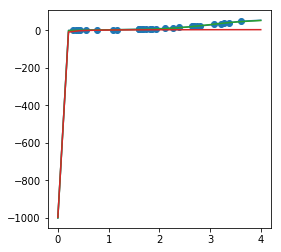

16.300105184939717


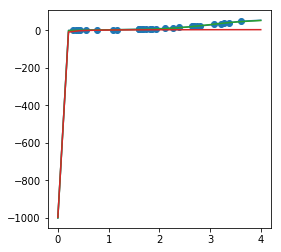

16.300105184939717


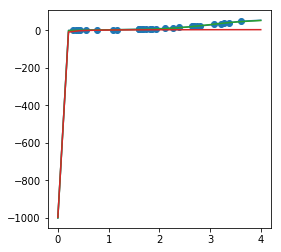

16.300105184939717


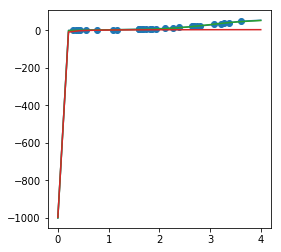

16.300105184939717


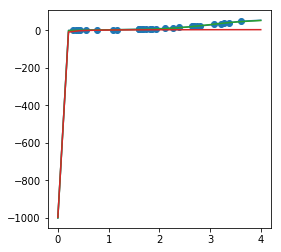

16.300105184939717


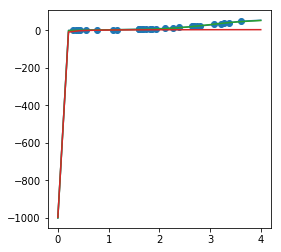

16.300105184939717


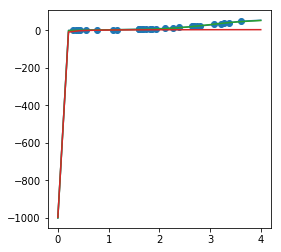

16.300105184939717


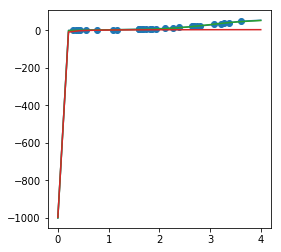

16.300105184939717


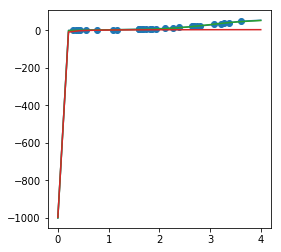

16.300105184939717


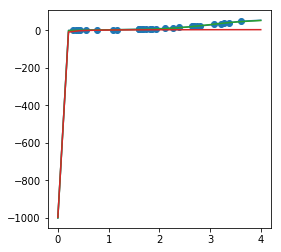

16.300105184939717


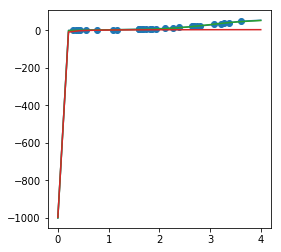

16.300105184939717


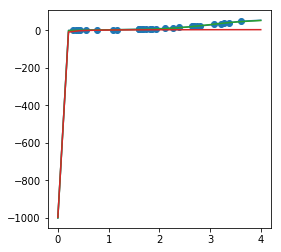

16.300105184939717


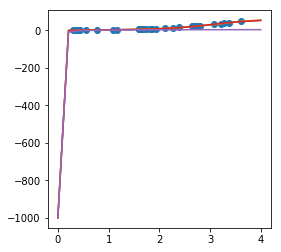

15.418592717040498


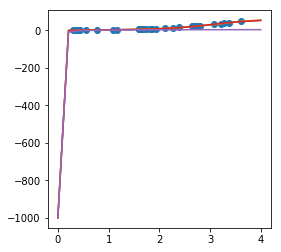

15.418592717040498


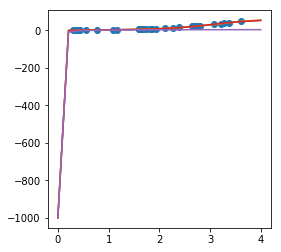

15.418592717040498


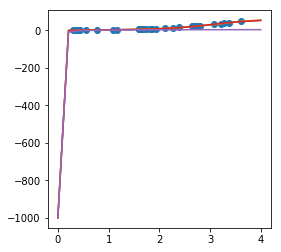

15.418592717040498


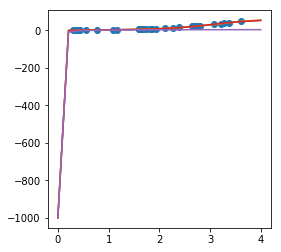

15.418592717040498


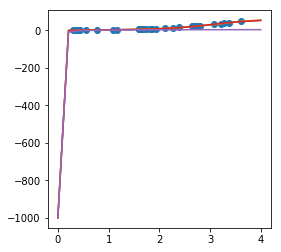

15.418592717040498


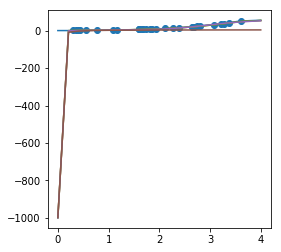

13.4541051576935


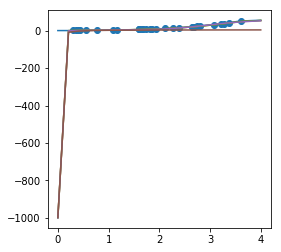

13.4541051576935


KeyboardInterrupt: 

In [32]:
reit_ = 1e9
last_reit = 1e9
SIMILARITY = 1e-5

for iteration in range(1000):
    gen2 = []
    sz = len(generation)
    
    gen2.append(generation[0])
    
    for i in range(sz // 30):
        gen2.append(mutation_rand_tree(generation[0]))
        gen2.append(mutation_rand_tree(generation[1]))
        gen2.append(mutation_rand_tree(generation[2]))
    for i in range(sz // 10):
        gen2.append(Being(4))
    for i in range(sz):
        t1 = generation[random.randint(0, sz / 2)]
        t2 = generation[random.randint(0, sz / 2)]
        gen2.append(mutation_rand_tree(crossfit(t1, t2)))
        
    generation = sorted(generation + gen2, key=lambda being : being.reit(X, Y) + being.number() / 200.)
    vals = [np.array([being_.calc(p, 0) for p in line]) for being_ in generation[:20]]
    
    
    
    ids = []
    for i in range(20):
        for q in range(i + 1, 20):
            #print (i, q)
            if (vals[i] - vals[q]).sum() < SIMILARITY:
                ids.append(q)
    ids = np.unique(ids)
    generation = [generation[i] for i in range(100 + len(ids)) if i not in ids]
    
    plt.figure(figsize=(4, 4))
    plt.scatter(X, Y)
    plt.plot(line, [generation[0].calc(p, 0) for p in line])
    plt.plot(line, [generation[1].calc(p, 0) for p in line])
    plt.plot(line, [generation[2].calc(p, 0) for p in line])
    plt.plot(line, [generation[3].calc(p, 0) for p in line])
    plt.plot(line, [generation[4].calc(p, 0) for p in line])
    plt.plot(line, [generation[5].calc(p, 0) for p in line])
    plt.show()
    
    print (generation[0].reit(X, Y))